<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.345986,45.330817,23.068781,-0.013590,115.731995,115.745245,-0.013250
1,0.0,1.0,61.355111,76.218336,60.215810,0.000224,207.789480,207.789746,-0.000266
2,0.0,2.0,61.381834,36.282080,71.313848,0.004742,178.982504,178.978693,0.003811
3,0.0,3.0,48.209300,45.884552,31.504392,-0.017062,135.581182,135.598163,-0.016981
4,0.0,4.0,46.375243,37.676441,78.909131,-0.005737,172.955078,172.961800,-0.006723
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.218597,99.177166,42.474908,0.003686,205.874357,205.870435,0.003922
249996,999.0,246.0,88.982509,52.554174,53.337121,-0.002452,204.871351,204.874324,-0.002972
249997,999.0,247.0,90.462849,25.854646,86.434381,0.007564,212.759440,212.752991,0.006450
249998,999.0,248.0,95.912938,28.331809,35.353472,0.003505,169.601724,169.598704,0.003021


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.345986,45.330817,23.068781,-0.013590,115.731995,115.745245,-0.013250
1,0.0,1.0,61.355111,76.218336,60.215810,0.000224,207.789480,207.789746,-0.000266
2,0.0,2.0,61.381834,36.282080,71.313848,0.004742,178.982504,178.978693,0.003811
3,0.0,3.0,48.209300,45.884552,31.504392,-0.017062,135.581182,135.598163,-0.016981
4,0.0,4.0,46.375243,37.676441,78.909131,-0.005737,172.955078,172.961800,-0.006723
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.218597,99.177166,42.474908,0.003686,205.874357,205.870435,0.003922
249996,999.0,246.0,88.982509,52.554174,53.337121,-0.002452,204.871351,204.874324,-0.002972
249997,999.0,247.0,90.462849,25.854646,86.434381,0.007564,212.759440,212.752991,0.006450
249998,999.0,248.0,95.912938,28.331809,35.353472,0.003505,169.601724,169.598704,0.003021


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

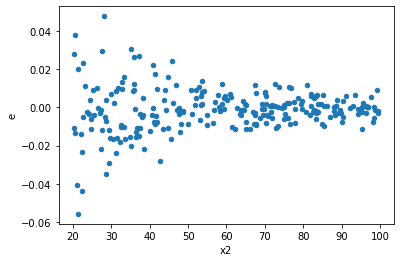

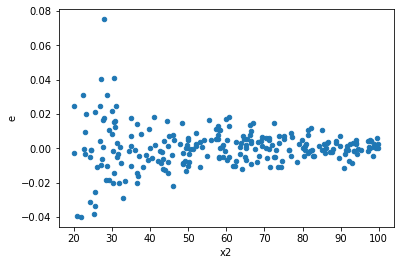

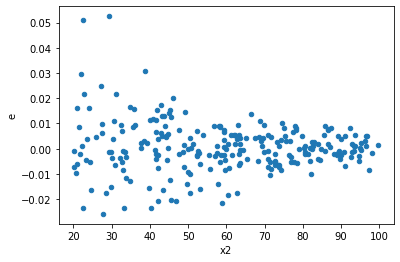

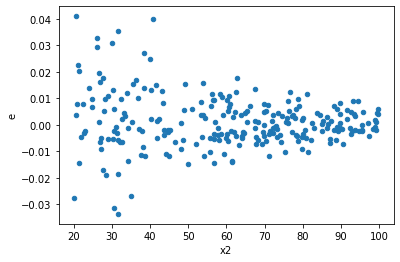

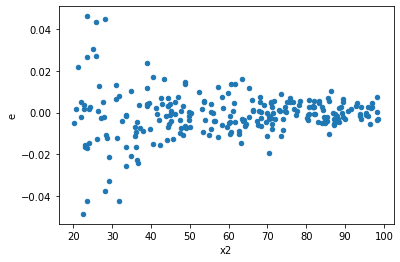

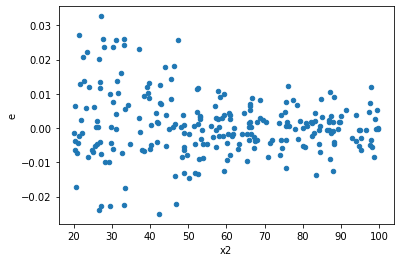

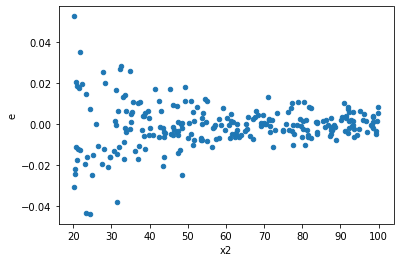

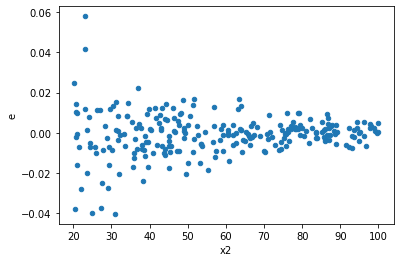

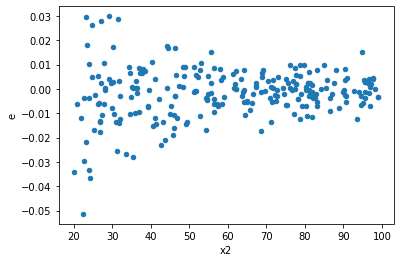

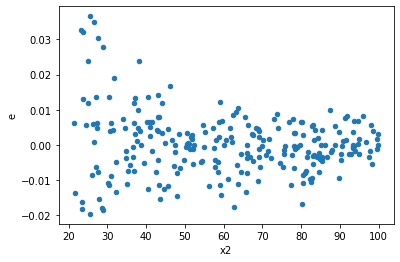

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,117.0,127.0,0.012876276578688877,0.015535795908145598,0.00011100238429904204,0.00012329996752496507,1.1115406541860369,0.5623951369252667,0.7188024315373667,Reject005=1 : Homoscedasticity
2.0,116.0,128.0,0.007433874218569952,0.012314407218774913,6.464238450930394e-05,9.69638363683064e-05,1.501226845369142,0.026515469374222667,0.9867422653128887,Reject005=0 : Heteroscedasticity
8.0,115.0,129.0,0.009074549724752705,0.012243915274383914,7.960131337502372e-05,9.565558808112433e-05,1.20282753403052,0.3124191712194748,0.8437904143902626,Reject005=1 : Homoscedasticity
13.0,130.0,114.0,0.012842550563572174,0.012030133336332594,9.955465553156725e-05,0.00010646135695869552,1.068212504589865,0.7135493549775291,0.6432253225112354,Reject005=1 : Homoscedasticity
14.0,119.0,125.0,0.011761129054493476,0.01922363145749535,9.967058520757183e-05,0.00015502928594754315,1.5560493437952285,0.01549890917582708,0.9922505454120865,Reject005=0 : Heteroscedasticity
15.0,136.0,108.0,0.011013476148556404,0.009952724001661615,8.158130480412152e-05,9.301611216506182e-05,1.1379749395096326,0.4739166361738929,0.7630416819130535,Reject005=1 : Homoscedasticity
18.0,133.0,111.0,0.004349544991331365,0.021445662548325868,3.2951098419177014e-05,0.00019496056862114425,5.907779842669295,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
20.0,111.0,133.0,0.010586765318614983,0.017258677466799086,9.624332107831803e-05,0.00013074755656665974,1.3605533138982333,0.09422803914675781,0.9528859804266211,Reject005=1 : Homoscedasticity
22.0,141.0,103.0,0.012624197217979185,0.011337808663842572,9.01728372712799e-05,0.00011115498690041737,1.2294397229481069,0.25466183329249725,0.8726690833537514,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,118.0,126.0,0.010656903839821312,0.009086977383613052,9.108464820360095e-05,7.269581906890442e-05,0.798545859710454,0.21446223486443297,Reject005=1 : Homoscedasticity
1.0,117.0,127.0,0.012876276578688877,0.015535795908145598,0.00011100238429904204,0.00012329996752496507,1.1115406541860369,1.4376048630747333,Reject005=1 : Homoscedasticity
2.0,116.0,128.0,0.007433874218569952,0.012314407218774913,6.464238450930394e-05,9.69638363683064e-05,1.501226845369142,0.026515469374222667,Reject005=0 : Heteroscedasticity
3.0,124.0,120.0,0.01782467978856226,0.013688203984522774,0.0001449160958419696,0.00011502692423968718,0.793533326738905,0.20366327181300573,Reject005=1 : Homoscedasticity
4.0,113.0,131.0,0.011063678299581214,0.012750633206741543,9.878284196054656e-05,9.808179389801186e-05,0.994121259355926,0.9705811865348918,Reject005=1 : Homoscedasticity
5.0,132.0,112.0,0.03668338298270518,0.003091546680238551,0.0002800258242954594,2.7851771894041e-05,0.09932586068034753,1.1812725657769191e-29,Reject005=0 : Heteroscedasticity
6.0,121.0,123.0,0.022463482152426828,0.013939258814961563,0.0001871956846035569,0.00011425621979476691,0.6104398288313776,0.006750827016951647,Reject005=0 : Heteroscedasticity
7.0,145.0,99.0,0.024921182236753363,0.0027721271521641408,0.00017306376553300948,2.8287011756776947e-05,0.16292109236213453,1.0955046535042488e-18,Reject005=0 : Heteroscedasticity
8.0,115.0,129.0,0.009074549724752705,0.012243915274383914,7.960131337502372e-05,9.565558808112433e-05,1.20282753403052,0.3124191712194748,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    646
Reject005=1 : Homoscedasticity      354
Name: Result_test, dtype: int64